# Time Series 

## Timestamps 

`pandas` represents an instant in time using the `pandas.Timestamp` class:

In [1]:
import pandas as pd

# Create a timestamp- gives python a reference timestamp to work with
pd.Timestamp(year=2025, 
            month=10, 
            day=16, 
            hour=9, 
            minute=56, 
            second=40)

Timestamp('2025-10-16 09:56:40')

In [3]:
pd.Series([pd.Timestamp(2020,10,16), 
          pd.Timestamp(2020,10,17), 
          pd.Timestamp(2020,10,18)])

0   2020-10-16
1   2020-10-17
2   2020-10-18
dtype: datetime64[ns]

## Data exploration

reading in the data and taking a look at it

In [4]:
# Read in precip data

URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

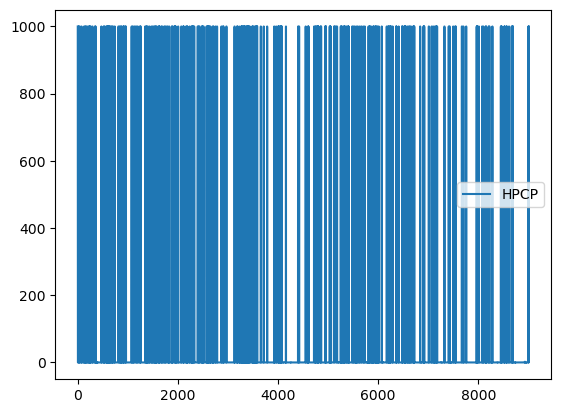

In [5]:
# Plot hourly precipitation in Boulder
precip.plot()
# What are we even plotting for one
# Plotting missing data
# Using index as x axis, what does that even represent

## Reading in missing data values

metadata indicates missing values are 999.99

we can directly read in this value as an NA value using `pd.read_csv`

In [6]:
# Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

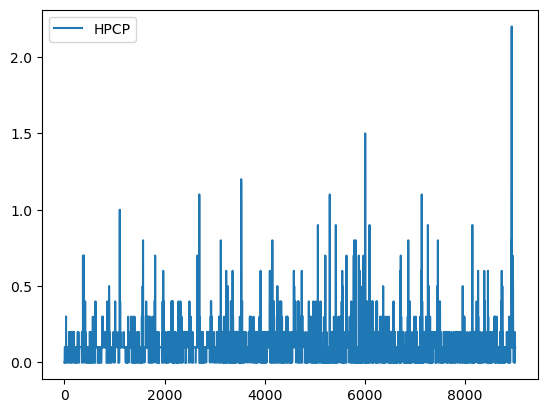

In [7]:
precip.plot()
# Still need to update index values

## Convert strings into dates

Notice `DATE` column in our dataframe is not of type `datetime`;


In [8]:
# Check whether DATE column is the correct type
precip.dtypes
# We don't want strings we want times

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [9]:
# Convert date column to timestamps
pd.to_datetime(precip["DATE"])

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [11]:
# Overwrite precip date col with data time
precip["DATE"] = pd.to_datetime(precip["DATE"])

# Check column to make sure it actually converted
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<Axes: xlabel='DATE'>

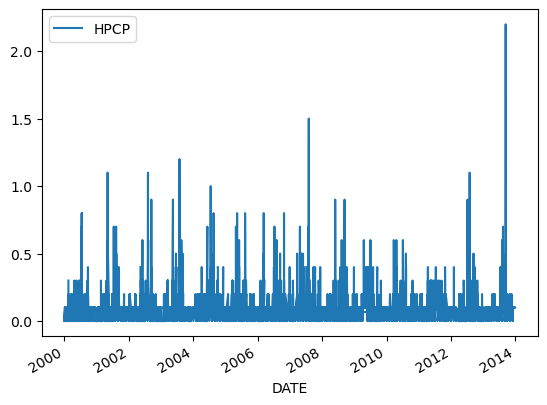

In [13]:
precip.plot(x = 'DATE', y = "HPCP")

In [14]:
precip = precip.set_index('DATE')
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<Axes: xlabel='DATE'>

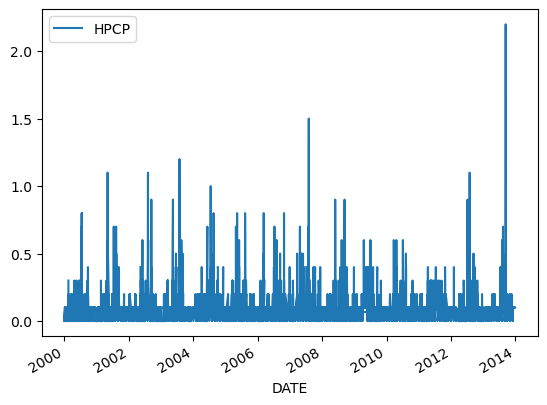

In [15]:
precip.plot()

In [18]:
## Read in a dataset in specific format

precip = pd.read_csv(URL, na_values =[999.99], 
                    index_col = ["DATE"], 
                    parse_dates=["DATE"])
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


# Leverage index to subset dataframe

## Subsetting by date
using `loc` selection to find specific dates

In [19]:
# Select precip data from Sept 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [20]:
# Select 2013 precip data
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

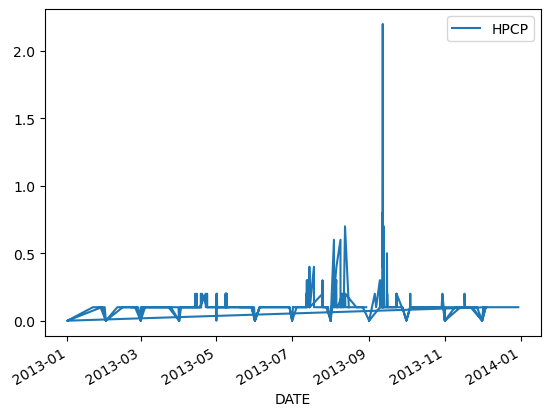

In [22]:
precip.loc['2013'].plot() # Shows high precipitation event in 2013 

## Resample 
resampling a time series means converting a time series from one frequency to another. For example, monhtly to yearly (downsampling) or weeklu to faily (upsampling)

we can resample with the `resample()` method. the simplest use is to casll

```
df.resample(new_frequency).aggreagtor_function()
```

where: 
new_frequency is a string representing the new frequency to resample the fata: 'D' for day, 'w' for week, 'Y' for year, 'M' for month

aggregator_function() is the dunction we will use to aggefate the data into the new frequency, for example, 
`max()`, `min()`, `sum()`, `avg()`

## Example
Our 2013 precipitation data has hoursly frequency, we want to resample it to daily frequency (downsampling)

In [24]:
# Resample 2013 hourly data to daily freq
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

In [26]:
daily_precip_2013.dtypes

STATION              object
STATION_NAME         object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

<Axes: title={'center': 'Precipitation in Boulder, CO during 2013'}, ylabel='Daily Precipitation (in)'>

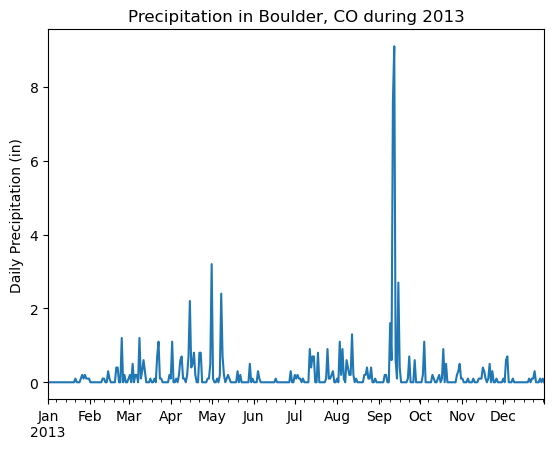

In [29]:
daily_precip_2013.plot(ylabel = "Daily Precipitation (in)", 
                    xlabel = '', 
                      title = "Precipitation in Boulder, CO during 2013", 
                      legend=False)

In [ ]:
# Complete workflow
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)